(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3479 - accuracy: 0.9034 - val_loss: 0.2136 - val_accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1870 - accuracy: 0.9470 - val_loss: 0.1534 - val_accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1387 - accuracy: 0.9606 - val_loss: 0.1312 - val_accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1149 - accuracy: 0.9675 - val_loss: 0.1127 - val_accuracy: 0.9653
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0992 - accuracy: 0.9715 - val_loss: 0.1067 - val_accuracy: 0.9676
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0884 - accuracy: 0.9743 - val_loss: 0.0971 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0782 - accura

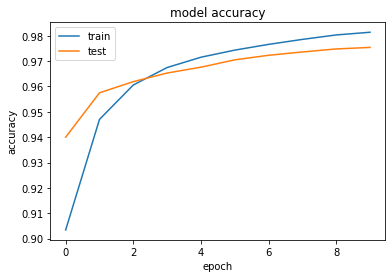

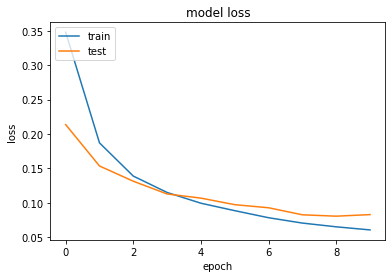

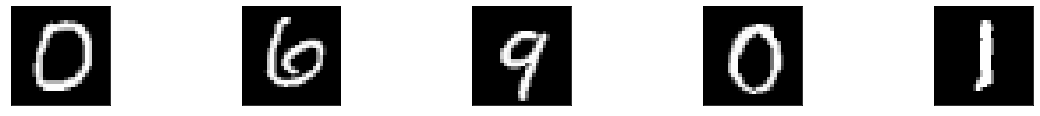

1/1 [==============================] - 0s 61ms/step


array([0, 6, 9, 0, 1])

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from keras.datasets import mnist


# In[49]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)
print(x_test.shape)


# In[50]:


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])


# In[51]:


model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


# In[52]:


from tensorflow.keras.utils import to_categorical
history=model.fit(
  x_train,
  to_categorical(y_train),
  epochs=10,
  validation_data=(x_test, to_categorical(y_test)),
)


# In[53]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# In[54]:


plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# In[55]:


predictions = model.predict(x_test[10:15])


# In[56]:


np.argmax(predictions, axis=1)